In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display_html
from itertools import chain,cycle
import yfinance as yf

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=df.to_html().replace('table','table style="display:inline-block"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [2]:
from lib.equity.fundamentals import Fundamentals, Ranks, DCF, Columns
from lib.equity.time_series import Technicals
from lib.equity.attribution import Attribution, FammaFrench, Brinson
from lib.fixed_income.rates import Treasuries
from lib.portfolio import drift_rebalancer as rebal
from lib.economy import activity as ecact

from calendar_dates import Calendar
cal = Calendar()


C:\dev\pynance\lib
C:\dev\pynance\lib


# Attribution

What factors are driving broader market returns?

In [3]:
atr = Attribution()
holdings = atr.get_holdings('XLF') #SPY
returns = atr.get_portfolio_returns()
portf_returns = returns.resample('M').sum()

Extracting: https://www.zacks.com/funds/etf/XLF/holding

1 Failed download:
- BRK.B: No data found, symbol may be delisted


## Famma French

In [4]:
ff = FammaFrench(model = 'ThreeFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:           portf_ex_rtn   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     36.92
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.16e-07
Time:                        18:09:24   Log-Likelihood:                -42.578
No. Observations:                  21   AIC:                             93.16
Df Residuals:                      17   BIC:                             97.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0424      0.478     -0.089      0.9

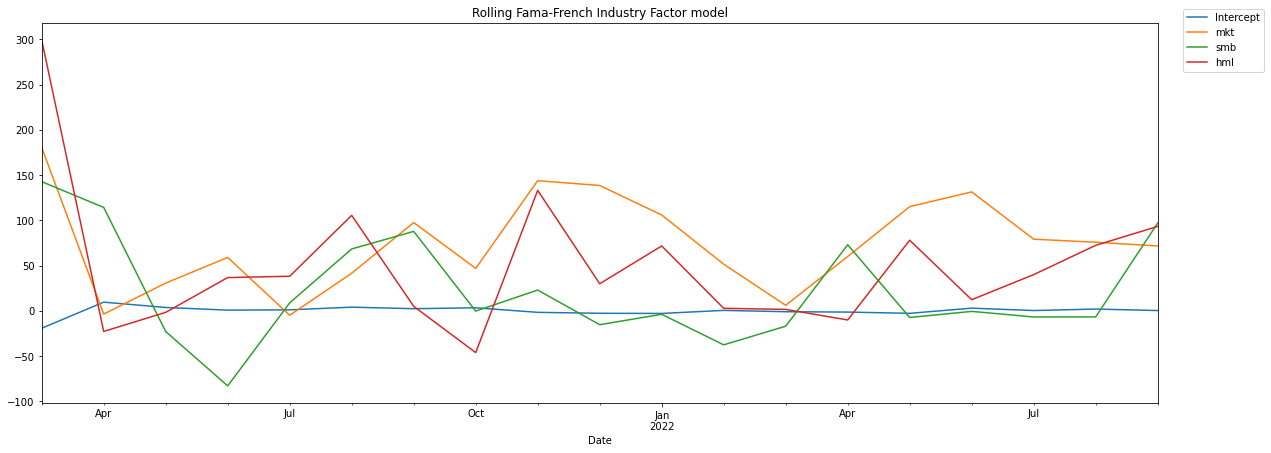

In [5]:
ff.plot()

In [6]:
ff = FammaFrench(model = 'IndustryFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:              portf_rtn   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     37.12
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.43e-06
Time:                        18:09:25   Log-Likelihood:                -25.528
No. Observations:                  21   AIC:                             73.06
Df Residuals:                      10   BIC:                             84.55
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1220      0.528      2.123      0.0

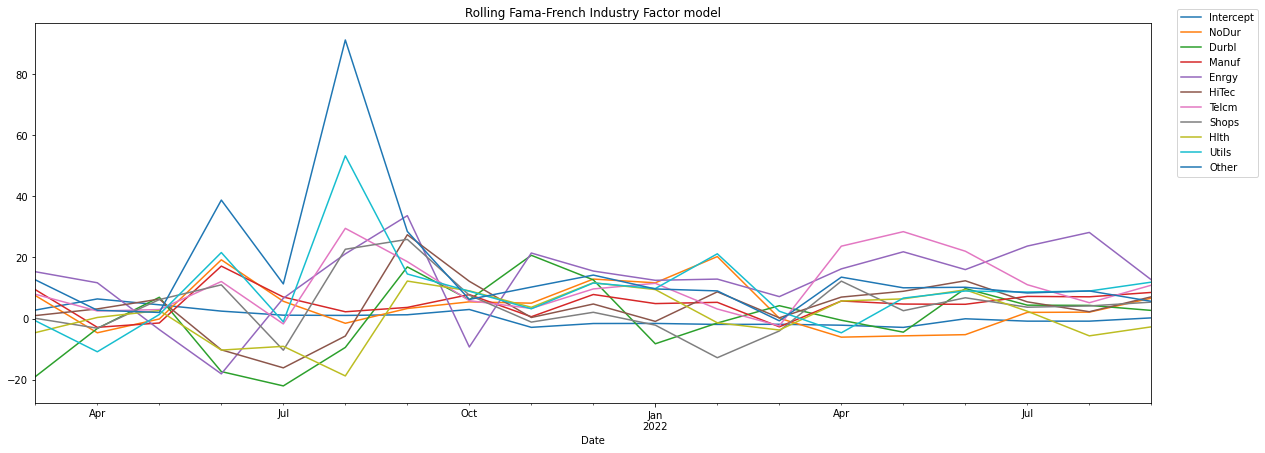

In [7]:
ff.plot()

## Brinson

In [8]:
...

Ellipsis

# Fundamentals

Fundamental Equity Analysis

In [9]:
ticker = ['JNJ']

In [10]:
rank = Ranks(ticker = ticker[0])
ranks = rank.get_ranks() 

In [11]:
fun = Fundamentals( ticker = ticker)
fun

<strong>Left Frame:</strong> Values as reported (in Millions, USD)<br>
<strong>Middle Frame:</strong> Percent Change <br>
<strong>Right Frame:</strong> Percentile Rank vs. Industry Peers (Higher values are assigned a lower percentile rank)<br>

In [12]:
x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.INCOME.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
revenue,"$23,338.0","$24,804.0","$23,426.0","$24,020.0","$23,791.0"
cogs,"$7,250.0","$7,955.0","$7,598.0","$7,919.0","$7,807.0"
gp,"$16,088.0","$16,849.0","$15,828.0","$16,101.0","$15,984.0"
opex,"$10,382.0","$11,957.0","$10,080.0","$10,014.0","$9,768.0"
opinc,"$5,706.0","$4,892.0","$5,748.0","$6,087.0","$6,216.0"
ebt,"$3,849.0","$4,836.0","$5,862.0","$5,840.0","$5,822.0"
netinc,"$3,667.0","$4,736.0","$5,149.0","$4,814.0","$4,458.0"
ebitda,"$5,683.0","$6,739.0","$7,641.0","$7,622.0","$7,558.0"
depamor,"$1,814.0","$1,843.0","$1,769.0","$1,744.0","$1,685.0"
calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30


In [13]:
x = fun.get( columns = Columns.CASHFLOW.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.CASHFLOW.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
cashneq,"$17,604.0","$14,487.0","$10,463.0","$10,983.0","$11,355.0"
netinc,"$3,667.0","$4,736.0","$5,149.0","$4,814.0","$4,458.0"
depamor,"$1,814.0","$1,843.0","$1,769.0","$1,744.0","$1,685.0"
opex,"$10,382.0","$11,957.0","$10,080.0","$10,014.0","$9,768.0"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0"
ncfo,"$8,290.0","$5,732.0","$3,979.0","$5,581.0","$6,284.0"
ncfbus,$12.0,$-15.0,$-4.0,$-205.0,$9.0
ncfi,"$-2,719.0","$-5,360.0","$-3,634.0","$-2,639.0","$-1,701.0"


In [14]:
x = fun.get( columns = Columns.BALANCE.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.BALANCE.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
assetsc,"$59,889.0","$60,979.0","$60,424.0","$63,847.0","$65,236.0"
assetsnc,"$119,339.0","$121,039.0","$117,931.0","$113,877.0","$109,888.0"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0"
assets,"$179,228.0","$182,018.0","$178,355.0","$177,724.0","$175,124.0"
liabilitiesc,"$44,561.0","$45,226.0","$43,390.0","$44,821.0","$45,543.0"
liabilitiesnc,"$64,395.0","$62,769.0","$60,256.0","$56,546.0","$54,982.0"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0"
debt,"$33,928.0","$33,751.0","$33,148.0","$32,597.0","$32,027.0"
equity,"$70,272.0","$74,023.0","$74,709.0","$76,357.0","$74,599.0"


## Peers

Selected ticker vs Industry Peers

Drug Manufacturers - General


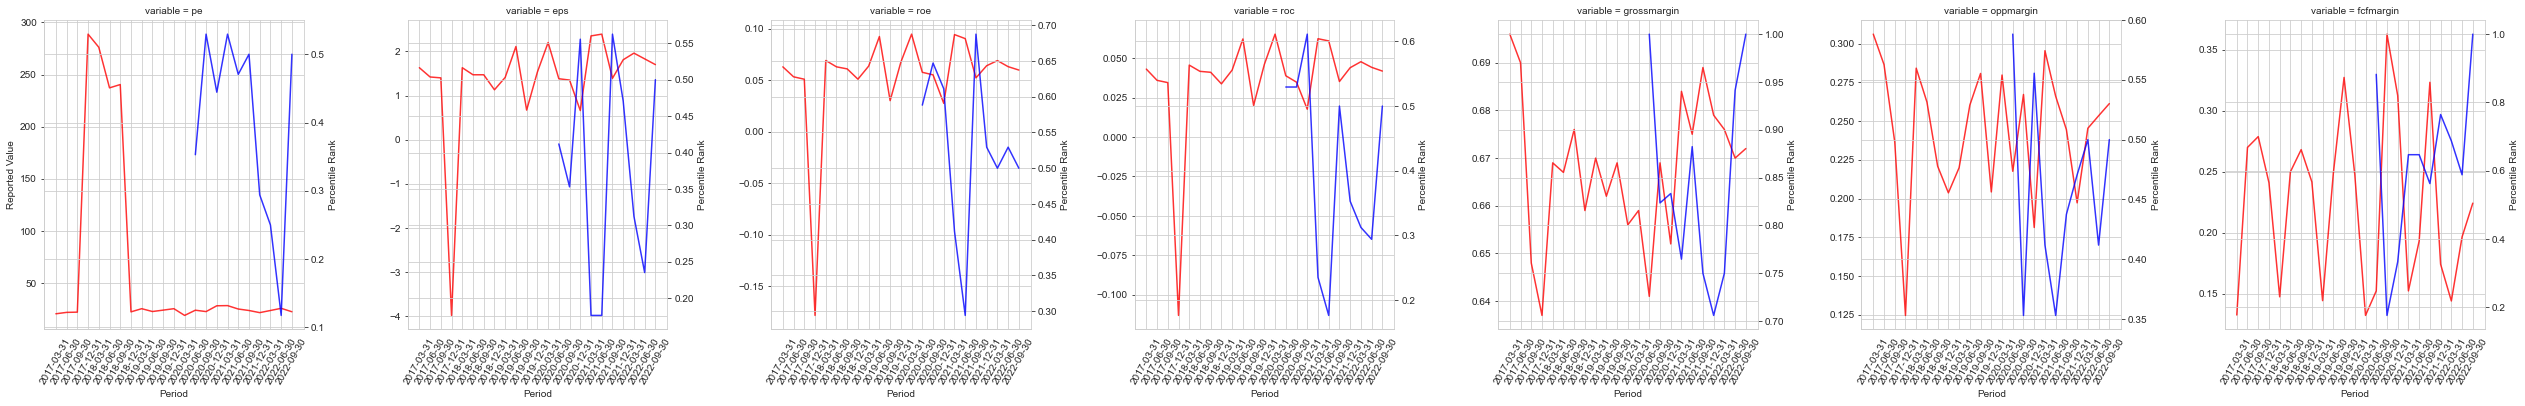

In [15]:
rank.plot_dual_axis_ranks(fun, cols = ['ticker', 'calendardate','pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin'])

Drug Manufacturers - General


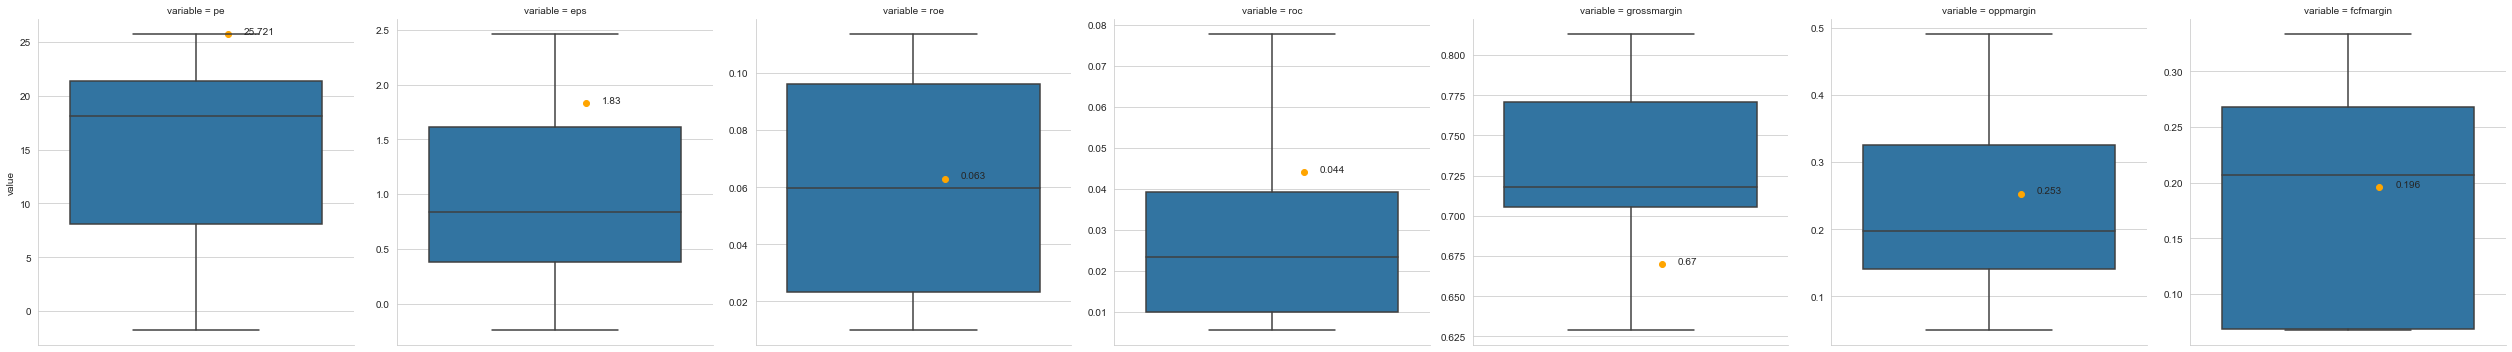

In [16]:
fun.plot_box_plot(cols = ['pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin'])

In [17]:
peers = fun.get_peers()
fun = Fundamentals(ticker = peers)
print(fun)

x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = fun.get( columns = Columns.CASHFLOW_.value, limit = 5 ).style_jupyter(fun.df)

display_side_by_side(x,y,z)

Drug Manufacturers - General
Fundamentals:Object:['JNJ', 'PFE', 'MRK', 'ABBV']


calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 revenue 
 ABBV 
 $14,342 
 $14,886 
 $13,538 
 $14,583 
 $nan 
 
 
 JNJ 
 $23,338 
 $24,804 
 $23,426 
 $24,020 
 $23,791 
 
 
 MRK 
 $13,154 
 $13,521 
 $15,901 
 $14,593 
 $14,959 
 
 
 PFE 
 $24,094 
 $23,635 
 $25,661 
 $27,742 
 $nan 
 
 
 cogs 
 ABBV 
 $4,390 
 $4,320 
 $4,052 
 $4,170 
 $nan 
 
 
 JNJ 
 $7,250 
 $7,955 
 $7,598 
 $7,919 
 $7,807 
 
 
 MRK 
 $3,450 
 $3,874 
 $5,380 
 $4,216 
 $3,934 
 
 
 PFE 
 $9,973 
 $9,589 
 $9,984 
 $8,648 
 $nan 
 
 
 gp 
 ABBV 
 $9,952 
 $10,566 
 $9,486 
 $10,413 
 $nan 
 
 
 JNJ 
 $16,088 
 $16,849 
 $15,828 
 $16,101 
 $15,984 
 
 
 MRK 
 $9,704 
 $9,647 
 $10,521 
 $10,377 
 $11,025 
 
 
 PFE 
 $14,121 
 $14,046 
 $15,677 
 $19,094 
 $nan 
 
 
 opex 
 ABBV 
 $5,646 
 $5,492 
 $4,769 
 $7,118 
 $nan 
 
 
 JNJ 
 $10,382 
 $11,957 
 $10,080 
 $10,014 
 $9,768 
 
 
 MRK 
 $4,888 
 $6,072 
 $4,952 
 $5,452 
 $7,013 
 
 
 PFE 
 $6,283 
 $9,864 
 $6,626 
 $7,647 
 $nan 
 
 
 opinc 
 ABBV 
 $4,306 
 $5,074 
 $4,717 
 $3,295 
 $nan 
 
 
 JNJ 
 $5,706 
 $4,892 
 $5,748 
 $6,087 
 $6,216 
 
 
 MRK 
 $4,816 
 $3,575 
 $5,569 
 $4,925 
 $4,012 
 
 
 PFE 
 $7,838 
 $4,182 
 $9,051 
 $11,447 
 $nan 
 
 
 ebt 
 ABBV 
 $3,687 
 $4,270 
 $4,926 
 $1,179 
 $nan 
 
 
 JNJ 
 $3,849 
 $4,836 
 $5,862 
 $5,840 
 $5,822 
 
 
 MRK 
 $5,262 
 $3,843 
 $4,864 
 $4,482 
 $3,578 
 
 
 PFE 
 $7,816 
 $3,728 
 $9,036 
 $11,475 
 $nan 
 
 
 netinc 
 ABBV 
 $3,179 
 $4,044 
 $4,490 
 $924 
 $nan 
 
 
 JNJ 
 $3,667 
 $4,736 
 $5,149 
 $4,814 
 $4,458 
 
 
 MRK 
 $4,567 
 $3,758 
 $4,310 
 $3,944 
 $3,248 
 
 
 PFE 
 $8,147 
 $3,394 
 $7,864 
 $9,905 
 $nan 
 
 
 ebitda 
 ABBV 
 $6,399 
 $6,820 
 $7,518 
 $3,763 
 $nan 
 
 
 JNJ 
 $5,683 
 $6,739 
 $7,641 
 $7,622 
 $7,558 
 
 
 MRK 
 $6,021 
 $4,678 
 $5,984 
 $5,420 
 $4,537 
 
 
 PFE 
 $9,176 
 $5,005 
 $10,223 
 $12,650 
 $nan 
 
 
 depamor 
 ABBV 
 $2,127 
 $1,979 
 $2,053 
 $2,052 
 $nan 
 
 
 JNJ 
 $1,814 
 $1,843 
 $1,769 
 $1,744 
 $1,685 
 
 
 MRK 
 $759 
 $835 
 $1,120 
 $938 
 $959 
 
 
 PFE 
 $1,360 
 $1,277 
 $1,187 
 $1,175 
 $nan 
 
 
 
 
 
 
 
   
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 divyield 
 ABBV 
 4.70% 
 3.80% 
 3.30% 
 3.50% 
 nan% 
 
 
 JNJ 
 2.60% 
 2.40% 
 2.40% 
 2.40% 
 2.70% 
 
 
 MRK 
 3.50% 
 3.40% 
 3.30% 
 3.00% 
 3.20% 
 
 
 PFE 
 3.60% 
 2.60% 
 3.00% 
 3.00% 
 nan% 
 
 
 grossmargin 
 ABBV 
 69.40% 
 71.00% 
 70.10% 
 71.40% 
 nan% 
 
 
 JNJ 
 68.90% 
 67.90% 
 67.60% 
 67.00% 
 67.20% 
 
 
 MRK 
 73.80% 
 71.30% 
 66.20% 
 71.10% 
 73.70% 
 
 
 PFE 
 58.60% 
 59.40% 
 61.10% 
 68.80% 
 nan% 
 
 
 netmargin 
 ABBV 
 69.39% 
 70.98% 
 70.07% 
 71.41% 
 nan% 
 
 
 JNJ 
 68.93% 
 67.93% 
 67.57% 
 67.03% 
 67.19% 
 
 
 MRK 
 73.77% 
 71.35% 
 66.17% 
 71.11% 
 73.70% 
 
 
 PFE 
 58.61% 
 59.43% 
 61.09% 
 68.83% 
 nan% 
 
 
 fcfmargin 
 ABBV 
 53.81% 
 32.84% 
 35.06% 
 33.34% 
 nan% 
 
 
 JNJ 
 32.32% 
 17.40% 
 14.39% 
 19.64% 
 22.41% 
 
 
 MRK 
 27.56% 
 28.27% 
 23.75% 
 21.74% 
 29.92% 
 
 
 PFE 
 42.35% 
 20.82% 
 22.98% 
 26.74% 
 nan% 
 
 
 oppmargin 
 ABBV 
 30.02% 
 34.09% 
 34.84% 
 22.59% 
 nan% 
 
 
 JNJ 
 24.45% 
 19.72% 
 24.54% 
 25.34% 
 26.13% 
 
 
 MRK 
 36.61% 
 26.44% 
 35.02% 
 33.75% 
 26.82% 
 
 
 PFE 
 32.53% 
 17.69% 
 35.27% 
 41.26% 
 nan% 
 
 
 roe 
 ABBV 
 23.46% 
 26.25% 
 27.57% 
 6.31% 
 nan% 
 
 
 JNJ 
 5.22% 
 6.40% 
 6.89% 
 6.30% 
 5.98% 
 
 
 MRK 
 12.76% 
 9.84% 
 10.54% 
 9.12% 
 7.31% 
 
 
 PFE 
 10.76% 
 4.40% 
 9.54% 
 11.36% 
 nan% 
 
 
 roic 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 ros 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 


## DCF

In [18]:
fun = Fundamentals( ticker = ticker)

## Base Case

In [19]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.025)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.05)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099805554793662
wacc:  0.02852281793660003
npv:  23785729813.1156
terminal value:  173923434367.0508
pv future cash flows:  75.1980359184081


## Bull

In [20]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.06)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.06)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099823555943874
wacc:  0.02858664354118717
npv:  26326700294.889736
terminal value:  207160110199.60605
pv future cash flows:  88.80594703258059


## Bear

In [21]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.01)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.02)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099826298565227
wacc:  0.028498073835899248
npv:  22765009441.036427
terminal value:  157099655629.7108
pv future cash flows:  68.4109388683528


# Technicals

In [22]:
tech = Technicals()

[*********************100%***********************]  1 of 1 completed
Adj Close    174.869995
Name: 2022-10-28 00:00:00, dtype: float64


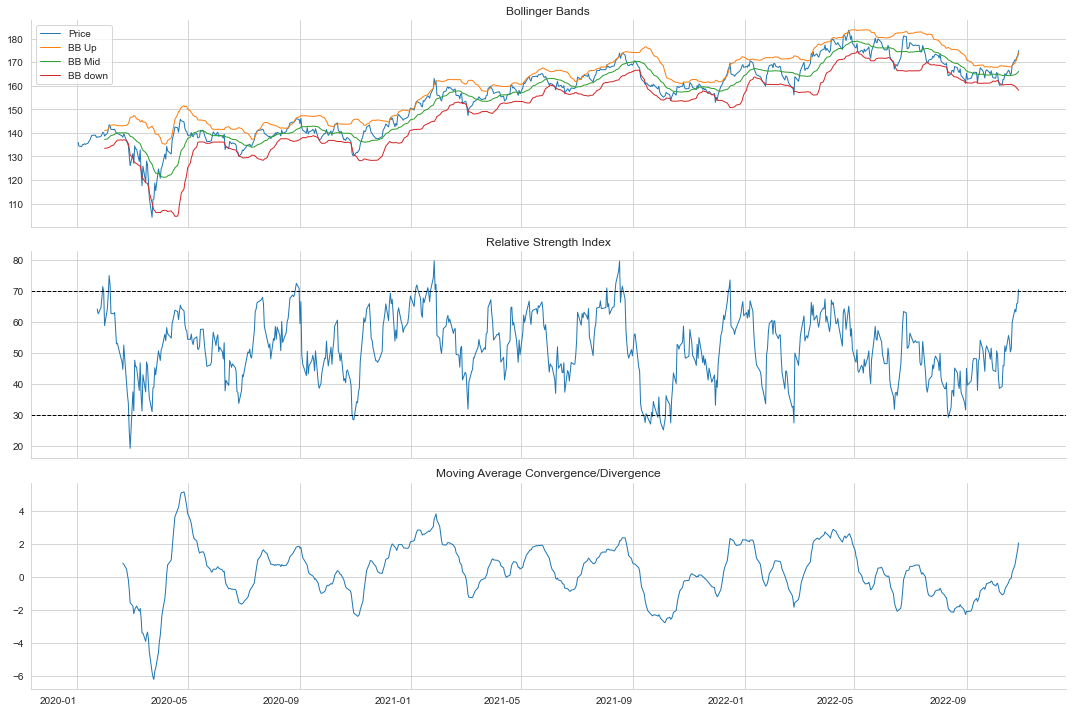

In [23]:
tech.ta_dashboard(fun)

# Rates

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [25]:
ust = Treasuries(years = ['2021', '2022'])

In [26]:
ust.df.tail()

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
date,,,,,,,,,,,,
2022-10-31,3.73,4.00,4.22,4.57,4.66,4.51,4.45,4.27,4.18,4.10,4.44,4.22
2022-11-01,3.72,4.00,4.23,4.58,4.75,4.54,4.48,4.27,4.18,4.07,4.37,4.14
2022-11-02,3.70,4.01,4.22,4.57,4.76,4.61,4.54,4.30,4.20,4.10,4.41,4.15
2022-11-03,3.75,4.04,4.25,4.57,4.78,4.71,4.63,4.36,4.26,4.14,4.42,4.18
2022-11-04,3.73,4.00,4.21,4.55,4.76,4.66,4.58,4.33,4.26,4.17,4.49,4.27


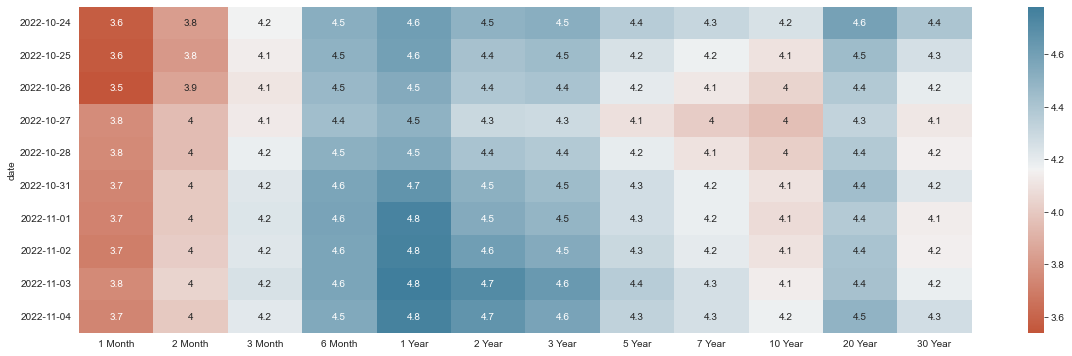

In [27]:
ust.rates_map()

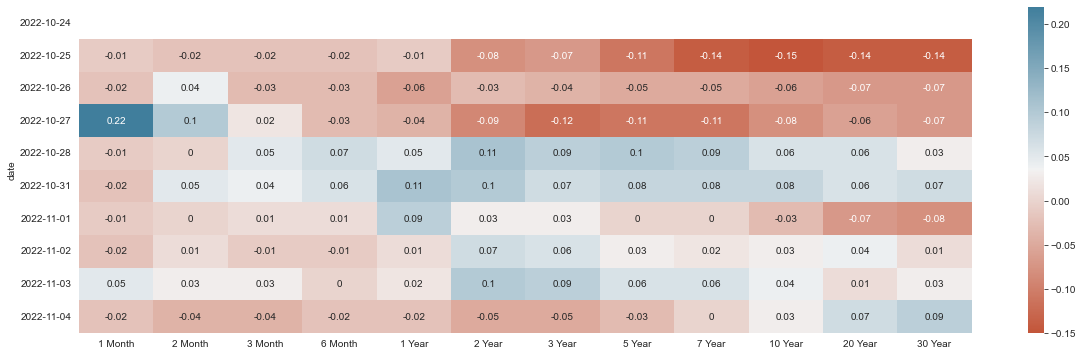

In [28]:
ust.rates_change_map()

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
Change Since,,,,,,,,,,,,
60 days,1.49,1.49,1.59,1.47,1.51,1.43,1.42,1.35,1.32,1.30,1.11,1.12
20 days,0.70,0.66,0.76,0.46,0.52,0.36,0.25,0.19,0.23,0.28,0.36,0.41
10 days,0.16,0.17,0.05,0.03,0.15,0.16,0.06,-0.03,-0.05,-0.08,-0.10,-0.13
5 days,0.00,0.00,-0.01,-0.02,0.10,0.15,0.13,0.06,0.08,0.07,0.05,0.05


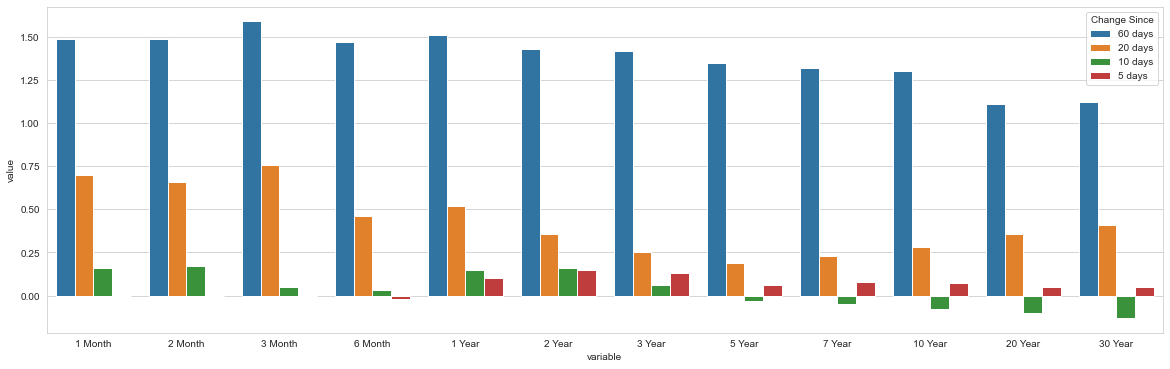

In [29]:
ust.change_since()

## Bootstrapping spot rates

In [30]:
zeroes, forwards = ust.build_zero_curve()

[3.67455529 4.0407429  4.28909823 4.55653638 4.64876359 4.62544573
 4.53208947 4.44433319 4.37479327 4.32146963 4.28029976 4.22187256]


In [31]:
zeroes

array([3.68618984, 4.02120631, 4.26857766, 4.56762398, 4.6900586 ,
       4.66779436, 4.5263006 , 4.3929754 , 4.30648721, 4.26906073,
       4.27055603, 4.34316929])

In [32]:
forwards

array([4.45734238, 4.88515215, 5.10729906, 5.15645771, 4.93157847,
       4.32397389, 3.9309584 , 3.83207778, 3.94171463, 4.15774097,
       4.40496917, 4.84010005])

[*********************100%***********************]  4 of 4 completed


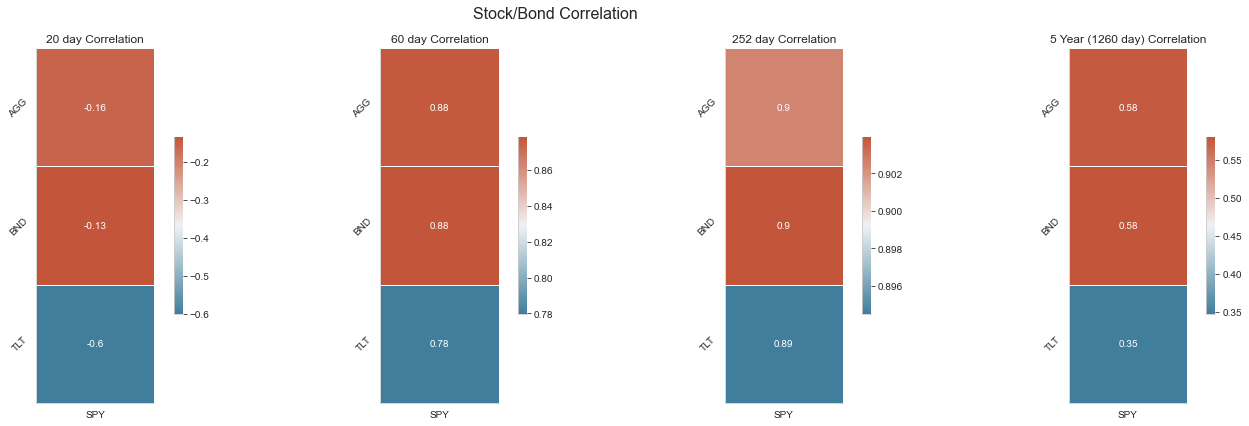

In [33]:
data = yf.download(f"TLT AGG BND SPY", start="2015-01-01", end=cal.today())['Adj Close']
ust.market_correlations(data, title = 'Stock/Bond Correlation')

[*********************100%***********************]  4 of 4 completed


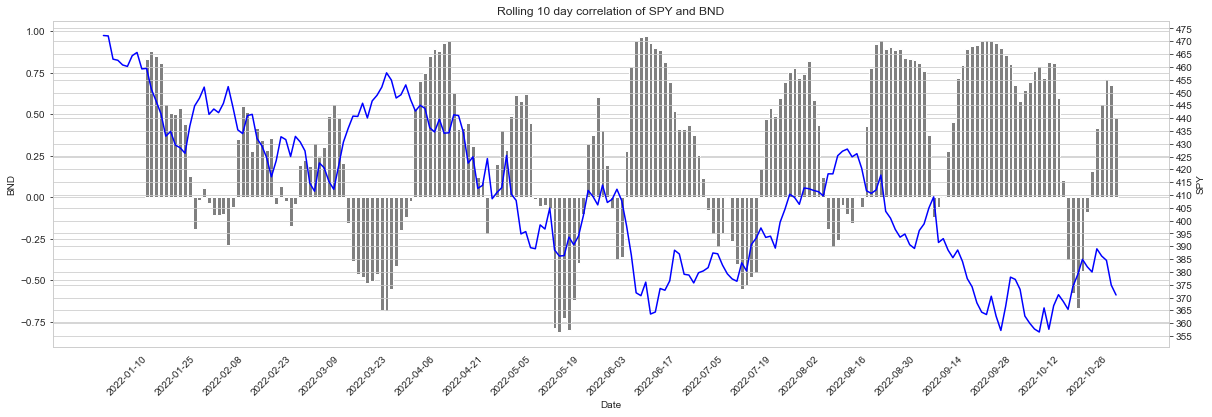

In [34]:
ust.stock_bond_correlation()

[*********************100%***********************]  1 of 1 completed


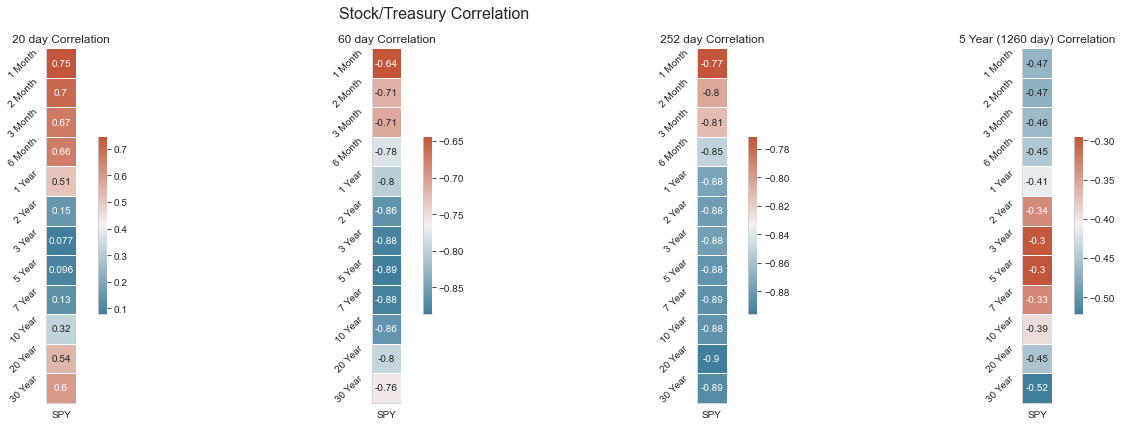

In [35]:
ust.stock_treasury_correlation()

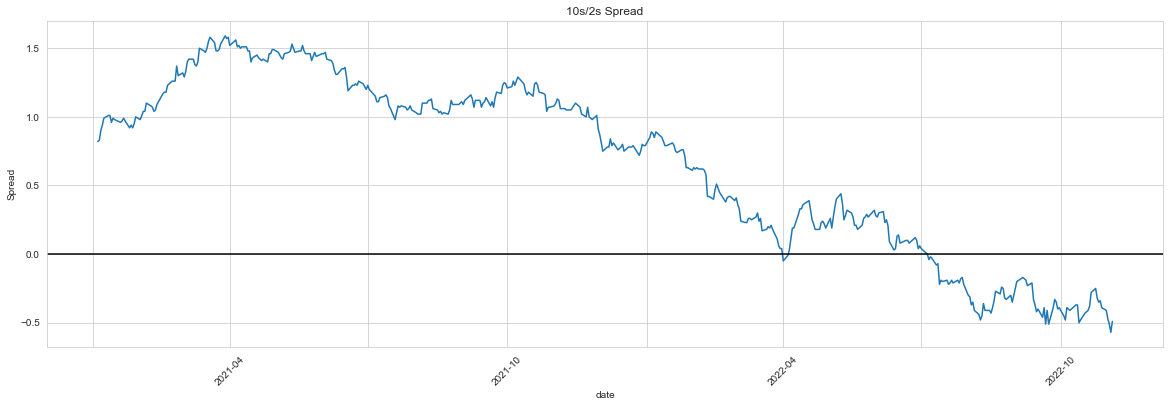

In [36]:
ust.tens_twos_spread()

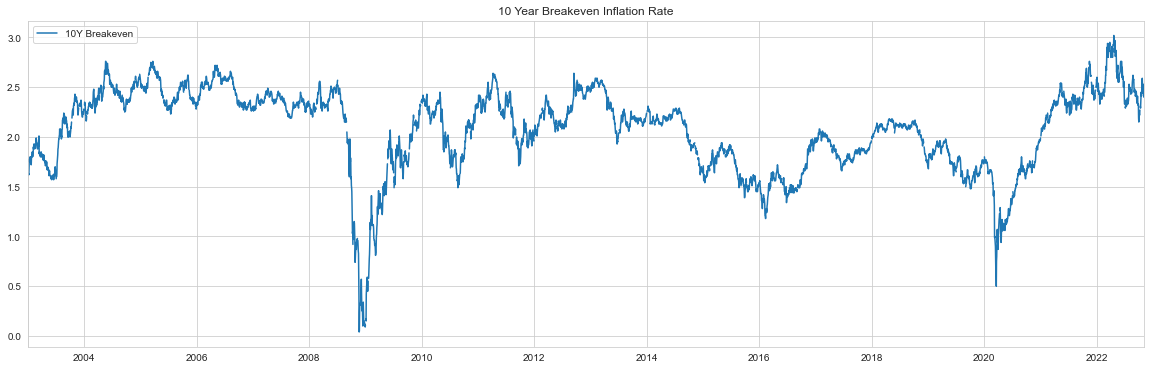

In [37]:
ust.breakeven_inflation()

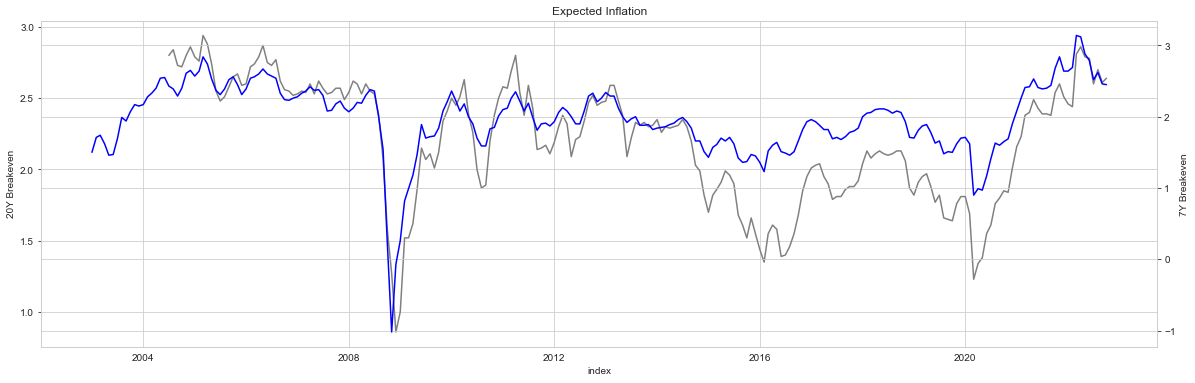

In [38]:
ust.expected_inflation()

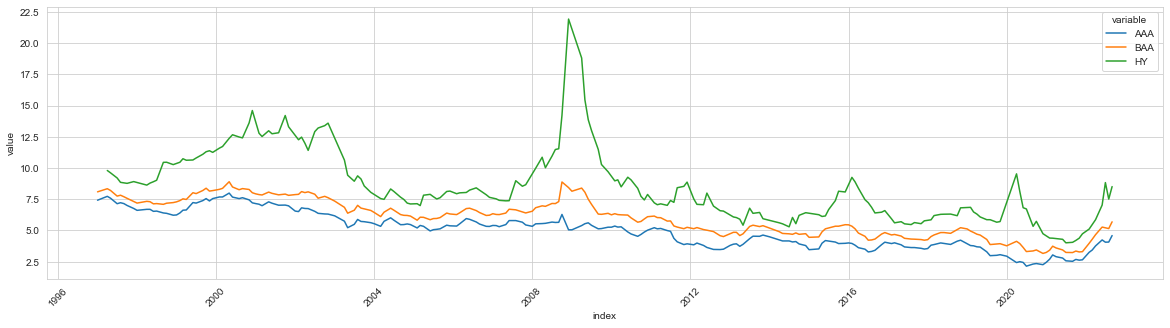

In [39]:
ust.credit_spreads()

# Economic Activity

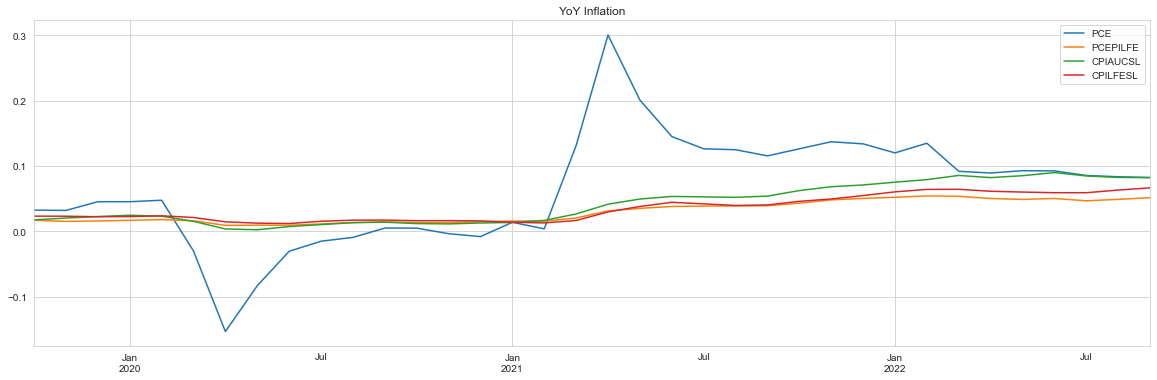

In [40]:
ecact.inflation()

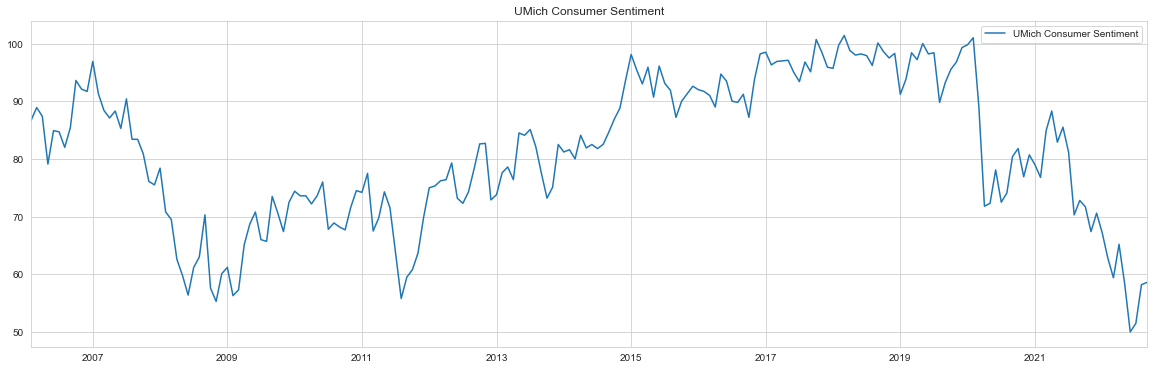

In [41]:
ecact.consumer_sentiment()

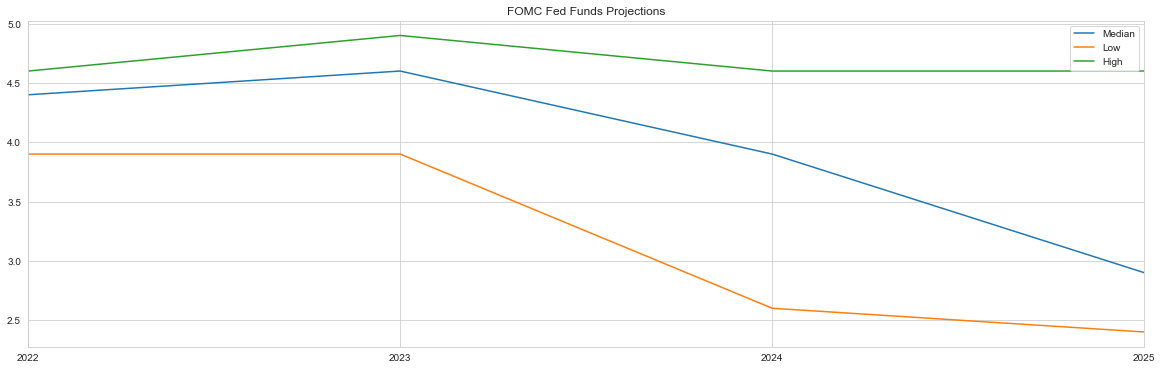

In [42]:
ecact.fomc_projections()

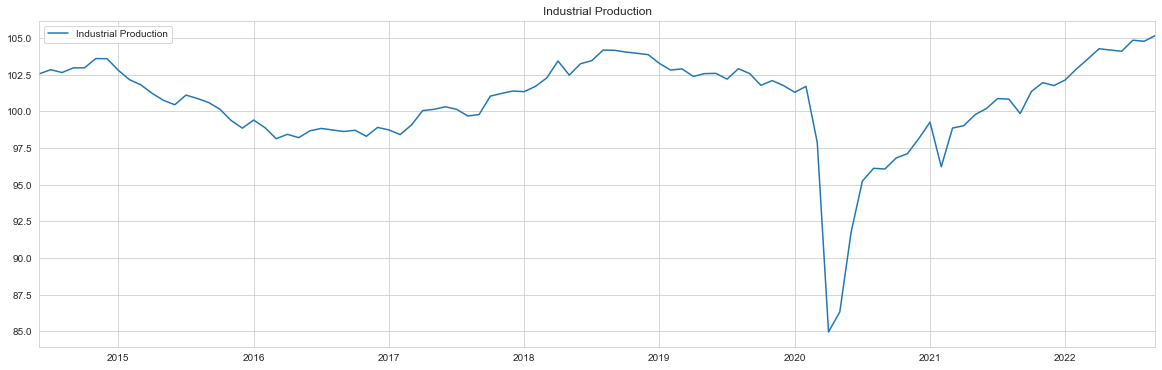

In [43]:
ecact.industrial_prod()

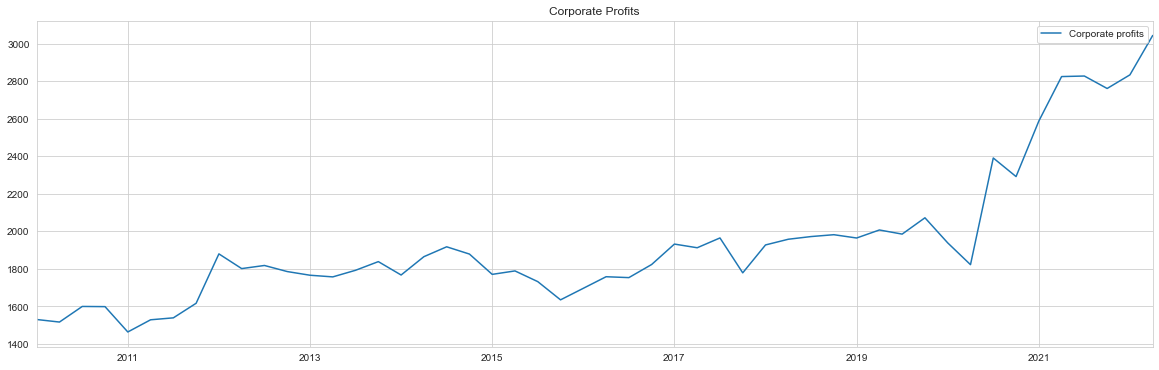

In [44]:
ecact.corporate_profits()

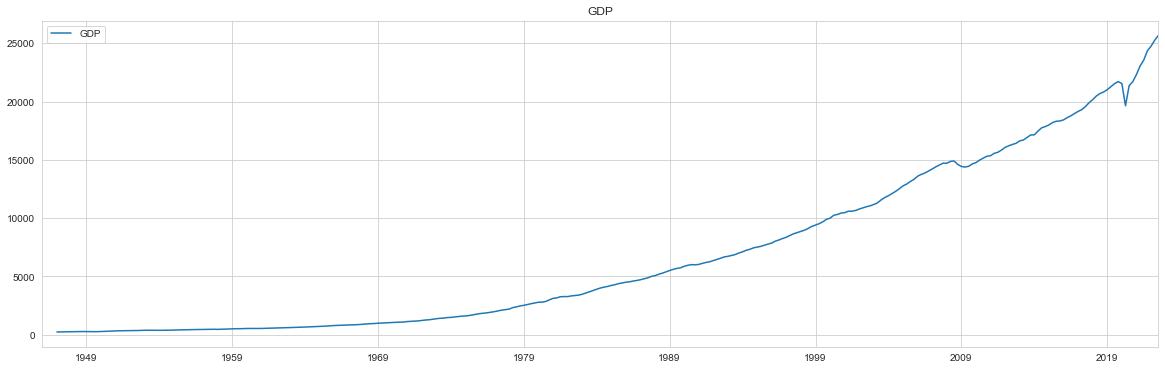

In [45]:
ecact.gdp()

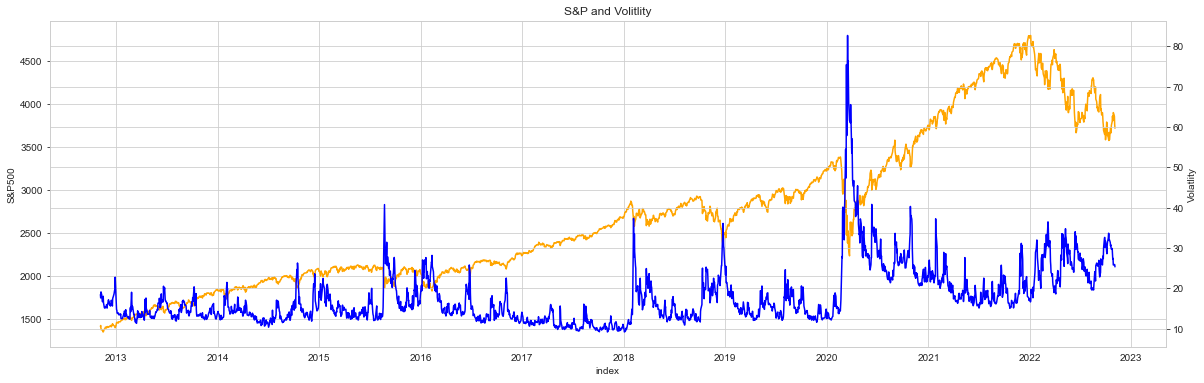

In [46]:
ecact.spy_and_vol()

# Rebalance

In [47]:
# portfolio targets "t"
columns_t = ['ticker','allocation_target','assetclass']
positions_t = [
    ['SPY',0.1,'ETF'],
    ['IWM',0.1,'ETF'],
    ['QQQ',0.1,'ETF'],
    ['XLF',0.1,'ETF'],
    ['XLI',0.1,'ETF'],
    ['EEM',0.1,'ETF'],
    ['XLV',0.1,'ETF'],
    ['IAU',0.1,'ETF'],
    ['TLT',0.1,'ETF'],
    ['SHV',0.05,'ETF'],
    ['HYG',0.05,'ETF'],
    ]

# portfolio current holdings "c"
columns_c = ['accounttype','accountid','lastrebaldate','ticker','assetclass','basisdate','costbasis','shares']
positions_c = [     ['IRA','0001','2020-11-16','SPY','ETF','2018-11-16', 260   ,913.483],    # traditional ira   
                    ['IRA','0001','2020-11-16','QQQ','ETF','2018-11-16', 175  ,514.298],
                    ['IRA','0001','2020-11-16','XLF','ETF','2018-11-16',  27  ,151.121],

                    ['401K','0002','2020-11-16','SPY','ETF','2018-11-16',  260  ,772.407],    # 401k
                    ['401K','0002','2020-11-16','IWM','ETF','2018-11-16',  157  ,151.578],

                    ['IRA','0003','2020-11-16','HYG','ETF','2018-11-16', 85   ,3.14],         # roth
                    ['IRA','0003','2020-11-16','IAU','ETF','2018-11-16',  18   ,549.871]        
              ]

In [48]:
tickers, targetalloc, start_port, agg_port = rebal.build_initial_portfolios(columns_t, positions_t, columns_c, positions_c)

In [49]:
ohlc = rebal.retrieve_latest_security_price(tickers)
ohlc = ohlc.to_frame(name='close').reset_index(level=1, drop=True)

...retrieving current market price data...
Tickers Not Found:  []


In [50]:
final_port = rebal.build_initial_drift_df(agg_port, targetalloc, ohlc)
final_port.head()

,ticker,lastrebaldate,assetclass,basisdate,costbasis,shares,allocation_target,close,value,allocation,correction,new_money_in
0,HYG,2020-11-16,ETF,2018-11-16,85.0,3.140,0.05,72.90,228.90600,0.000279,0.049721,50.0
1,IAU,2020-11-16,ETF,2018-11-16,18.0,549.871,0.10,31.91,17546.38361,0.021383,0.078617,100.0
2,IWM,2020-11-16,ETF,2018-11-16,157.0,151.578,0.10,178.68,27083.95704,0.033005,0.066995,100.0
3,QQQ,2020-11-16,ETF,2018-11-16,175.0,514.298,0.10,264.68,136124.39464,0.165885,-0.065885,100.0
4,SPY,2020-11-16,ETF,2018-11-16,260.0,1685.890,0.10,376.35,634484.70150,0.773203,-0.673203,100.0


In [51]:
rebal_port, stable_port = rebal.build_initial_order_df(final_port)

In [52]:
rebal_port.head()

,ticker,lastrebaldate,assetclass,basisdate,costbasis,shares,allocation_target,close,value,allocation,...,rebal_flag_time,rebal_flag_exit,rebal_flag_newmoney,rebal_flag,value_chg,shares_chg,final_shares_chg,new_shares,new_value,new_value_chg
0,HYG,2020-11-16,ETF,2018-11-16,85.0,3.140,0.05,72.90,228.90600,0.000279,...,0,0,1,1,40850.736795,560.366760,560.0,563.140,41052.90600,40824.00
1,IAU,2020-11-16,ETF,2018-11-16,18.0,549.871,0.10,31.91,17546.38361,0.021383,...,0,0,1,1,64612.901980,2024.848072,2024.0,2573.871,82132.22361,64585.84
2,IWM,2020-11-16,ETF,2018-11-16,157.0,151.578,0.10,178.68,27083.95704,0.033005,...,0,0,1,1,55075.328550,308.234433,308.0,459.578,82117.39704,55033.44
3,QQQ,2020-11-16,ETF,2018-11-16,175.0,514.298,0.10,264.68,136124.39464,0.165885,...,0,0,1,1,-53965.109050,-203.888125,-203.0,311.298,82394.35464,-53730.04
4,SPY,2020-11-16,ETF,2018-11-16,260.0,1685.890,0.10,376.35,634484.70150,0.773203,...,0,0,1,1,-552325.415910,-1467.584472,-1467.0,218.890,82379.25150,-552105.45


In [53]:
exec_port = rebal.build_execution_df(stable_port, rebal_port)
exec_port.head()

,ticker,lastrebaldate,assetclass,basisdate,costbasis,shares,allocation_target,close,value,allocation,correction,new_money_in,rebal_flag,final_shares_chg,new_shares,new_value,new_value_chg,final_allocation
0,HYG,2020-11-16,ETF,2018-11-16,85.0,3.140,0.05,72.90,228.90600,0.000279,0.049721,50.0,1,560.0,563.140,41052.90600,40824.00,0.049956
1,IAU,2020-11-16,ETF,2018-11-16,18.0,549.871,0.10,31.91,17546.38361,0.021383,0.078617,100.0,1,2024.0,2573.871,82132.22361,64585.84,0.099945
2,IWM,2020-11-16,ETF,2018-11-16,157.0,151.578,0.10,178.68,27083.95704,0.033005,0.066995,100.0,1,308.0,459.578,82117.39704,55033.44,0.099927
3,QQQ,2020-11-16,ETF,2018-11-16,175.0,514.298,0.10,264.68,136124.39464,0.165885,-0.065885,100.0,1,-203.0,311.298,82394.35464,-53730.04,0.100264
4,SPY,2020-11-16,ETF,2018-11-16,260.0,1685.890,0.10,376.35,634484.70150,0.773203,-0.673203,100.0,1,-1467.0,218.890,82379.25150,-552105.45,0.100245


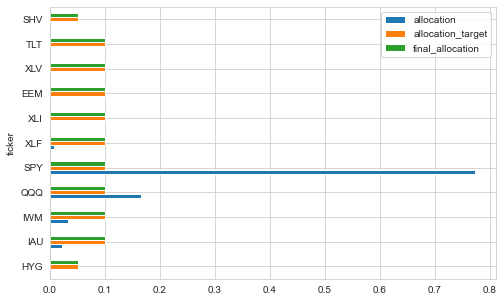

In [54]:
import matplotlib.pyplot as plt
graph_port = exec_port[['ticker','allocation','allocation_target','final_allocation']].copy()
graph_port.plot.barh(x='ticker',figsize=(8,5))
plt.show()

In [55]:
port = rebal.merge_drift_and_execution(start_port, exec_port)
port.head()

,accounttype,accountid,ticker,shares,assetclass,close,value,final_shares_chg,new_shares,new_value,new_value_chg,final_allocation,value_orig,tick_alloc
0,IRA,0003,HYG,3.140,ETF,72.90,228.90600,560.0,563.140,41052.90600,40824.00,0.049956,228.90600,1.00000
1,IRA,0003,IAU,549.871,ETF,31.91,17546.38361,2024.0,2573.871,82132.22361,64585.84,0.099945,17546.38361,1.00000
2,401K,0002,IWM,151.578,ETF,178.68,27083.95704,308.0,459.578,82117.39704,55033.44,0.099927,27083.95704,1.00000
3,IRA,0001,QQQ,514.298,ETF,264.68,136124.39464,-203.0,311.298,82394.35464,-53730.04,0.100264,136124.39464,1.00000
4,IRA,0001,SPY,913.483,ETF,376.35,634484.70150,-1467.0,218.890,82379.25150,-552105.45,0.100245,343789.32705,0.54184


In [56]:
port = rebal.catch_edge_cases(port)
port.head()

,accounttype,accountid,ticker,shares,assetclass,close,value,final_shares_chg,new_shares,new_value,new_value_chg,final_allocation
0,IRA,0003,HYG,3.140,ETF,72.90,228.90600,560.000000,563.140000,41052.906000,40824.000000,0.049956
1,IRA,0003,IAU,549.871,ETF,31.91,17546.38361,2024.000000,2573.871000,82132.223610,64585.840000,0.099945
2,401K,0002,IWM,151.578,ETF,178.68,27083.95704,308.000000,459.578000,82117.397040,55033.440000,0.099927
3,IRA,0001,QQQ,514.298,ETF,264.68,136124.39464,-203.000000,311.298000,82394.354640,-53730.040000,0.100264
4,IRA,0001,SPY,913.483,ETF,376.35,343789.32705,-794.879595,118.603405,44636.391341,-299152.935709,0.054317


# Options

In [57]:
import pandas as pd
from yahoo_fin import options
import QuantLib as ql
import datetime
ql.__version__

'1.27'

In [58]:
ticker = 'XLF'
dates = options.get_expiration_dates(ticker)
chain = options.get_options_chain(ticker)
calls, puts = chain['calls'], chain['puts']
# calls

In [59]:
tickers = ['XLF', 'XLE', 'IVV', 'QQQ', 'IBB']
data = {}
date_select = pd.to_datetime(options.get_expiration_dates(ticker)[5], format = '%B %d, %Y').strftime('%m/%d/%Y')
print(date_select)
for ticker in tickers:
    try:
        data[ticker] = {
            'dates':options.get_expiration_dates(ticker),
            'chain':options.get_options_chain(ticker, date_select)
            }
    except Exception:
        print(ticker + " failed")

12/09/2022


In [60]:
puts = data['XLF']['chain']['puts']
puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,XLF221209P00025000,2022-11-03 1:53PM EDT,25.0,0.01,0.00,0.03,0.00,-,5,6,46.88%
1,XLF221209P00028500,2022-10-27 11:30AM EDT,28.5,0.14,0.03,0.07,0.00,-,-,1,33.79%
2,XLF221209P00029000,2022-10-27 10:14AM EDT,29.0,0.14,0.05,0.10,0.00,-,-,10,33.59%
3,XLF221209P00029500,2022-11-03 11:15AM EDT,29.5,0.15,0.07,0.11,0.00,-,11,23,31.35%
4,XLF221209P00030000,2022-11-04 3:59PM EDT,30.0,0.12,0.10,0.15,-0.10,-45.45%,4,45,30.76%
5,XLF221209P00030500,2022-11-03 10:24AM EDT,30.5,0.26,0.13,0.19,0.00,-,13,30,29.59%
6,XLF221209P00031500,2022-11-04 11:51AM EDT,31.5,0.32,0.20,0.35,-0.02,-5.88%,1,14,28.96%
7,XLF221209P00032000,2022-11-04 1:35PM EDT,32.0,0.43,0.33,0.40,-0.07,-14.00%,163,257,26.71%
8,XLF221209P00033000,2022-11-03 3:50PM EDT,33.0,0.70,0.45,0.70,-0.17,-19.54%,5,221,26.12%
9,XLF221209P00033500,2022-11-04 3:08PM EDT,33.5,0.85,0.63,0.87,-0.29,-25.44%,2,27,25.15%


In [61]:
import yahoo_fin.stock_info as si
price = si.get_data("XLF")['close'].iloc[-1]
price

33.90999984741211

In [62]:
contract = puts[puts['Contract Name']=='XLF221209P00031500']
contract

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
6,XLF221209P00031500,2022-11-04 11:51AM EDT,31.5,0.32,0.2,0.35,-0.02,-5.88%,1,14,28.96%


In [63]:
date = pd.to_datetime(date_select)

maturity_date = ql.Date(date.day, date.month, date.year)
spot_price = price
strike_price = contract['Strike'].values[0]
volatility = float(contract['Implied Volatility'].values[0].replace('%',''))/100
dividend_rate =  0
option_type = ql.Option.Put

risk_free_rate = 0.04
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

today = datetime.datetime.today()
calculation_date = ql.Date(today.day, today.month,  today.year)
ql.Settings.instance().evaluationDate = calculation_date

In [64]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date

In [65]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [66]:
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)
american_option

<QuantLib.QuantLib.VanillaOption; proxy of <Swig Object of type 'ext::shared_ptr< VanillaOption > *' at 0x0000029DB82595D0> >

In [67]:
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
american_option.NPV()

0.31484349523421923

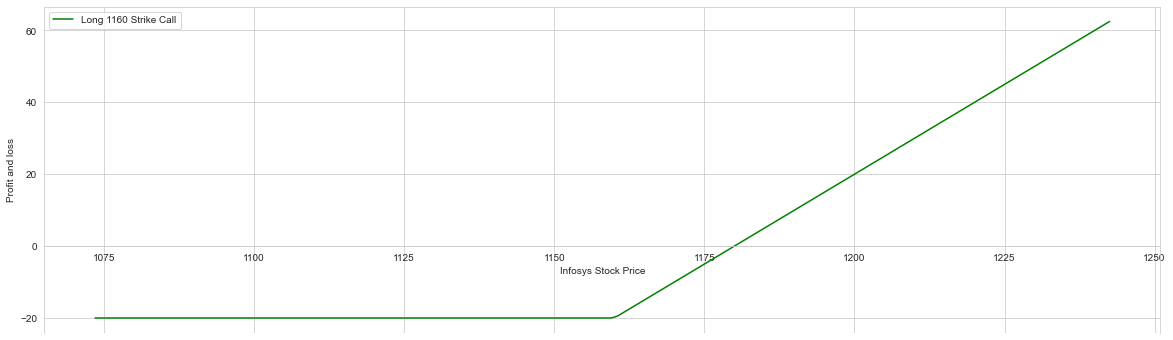

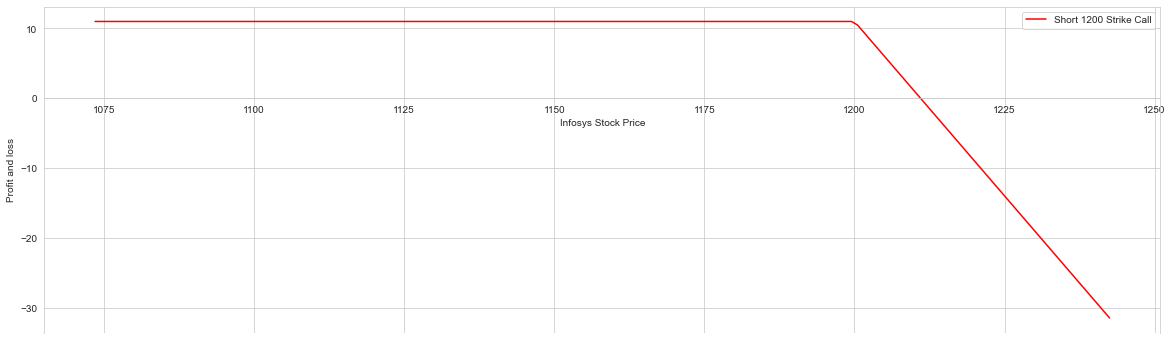

Max Profit: 31.0
Max Loss: -9.0


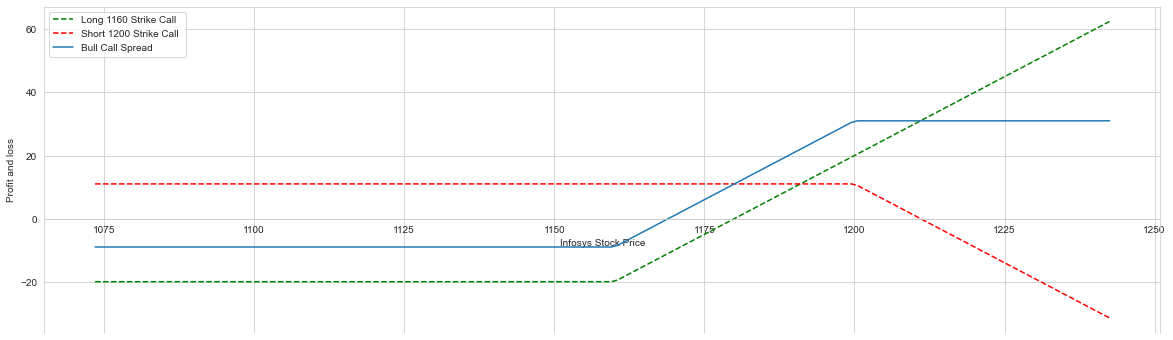

In [68]:
# from lib.derivatives.options.strategies import bull_call_spread as bcs
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

spot_price = 1130
strike_price_long_call = 1160
premium_long_call = 20
strike_price_short_call = 1200
premium_short_call = 11
sT = np.arange(0.95*spot_price,1.1*spot_price,1)


payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 1160 Strike Call',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 1200 Strike Call',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print ("Max Loss:", min(payoff_bull_call_spread))
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='Long 1160 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 1200 Strike Call ',color='r')
ax.plot(sT,payoff_bull_call_spread,label='Bull Call Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()